In [102]:
# dependencies
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter('ignore')
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

In [80]:
# variables
CLEANED_DATA_PATH="./data/cleaned_data.parquet"

In [81]:
data = pd.read_parquet(CLEANED_DATA_PATH)

In [82]:
df = data.copy()
df.head(3)

,Title,Artist,ConstituentID,BeginDate,EndDate,Medium,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Height (cm),Width (cm),Nationality,Gender
0,Ferdinandsbrücke Project,Otto Wagner,6210,1841-01-01,1918-01-01,Ink and cut-and-pasted painted pages on paper,Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,48.6000,168.9000,Austrian,Male
1,City of Music,Christian de Portzamparc,7470,1944-01-01,1927-01-01,Paint and colored pencil on print,Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,40.6401,29.8451,French,Male
2,Villa near Vienna Project,Emil Hoppe,7605,1876-01-01,1957-01-01,"Graphite, pen, color pencil, ink, and gouache ...",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,34.3000,31.8000,Austrian,Male


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139632 entries, 0 to 139631
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Title            139632 non-null  object        
 1   Artist           139632 non-null  object        
 2   ConstituentID    139632 non-null  object        
 3   BeginDate        139632 non-null  datetime64[ns]
 4   EndDate          139632 non-null  datetime64[ns]
 5   Medium           139632 non-null  object        
 6   CreditLine       139632 non-null  object        
 7   AccessionNumber  139632 non-null  object        
 8   Classification   139632 non-null  object        
 9   Department       139632 non-null  object        
 10  DateAcquired     139632 non-null  datetime64[ns]
 11  Cataloged        139632 non-null  object        
 12  ObjectID         139632 non-null  int64         
 13  URL              139632 non-null  object        
 14  ThumbnailURL     139

### Univariate Analysis

Median Height (cm): 24.5


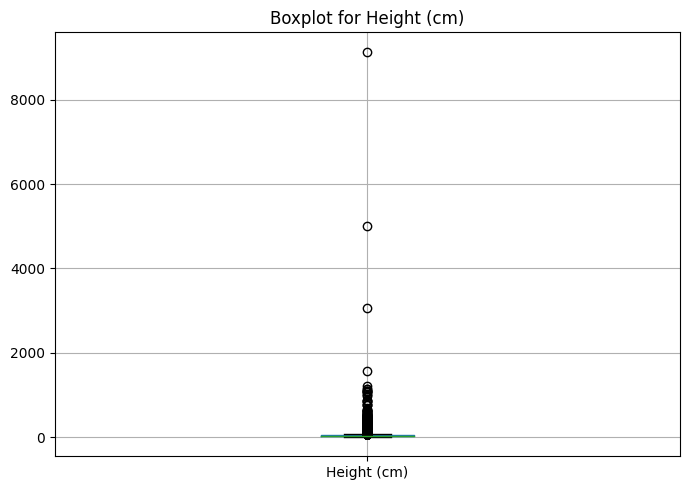

Median Width (cm): 23.1


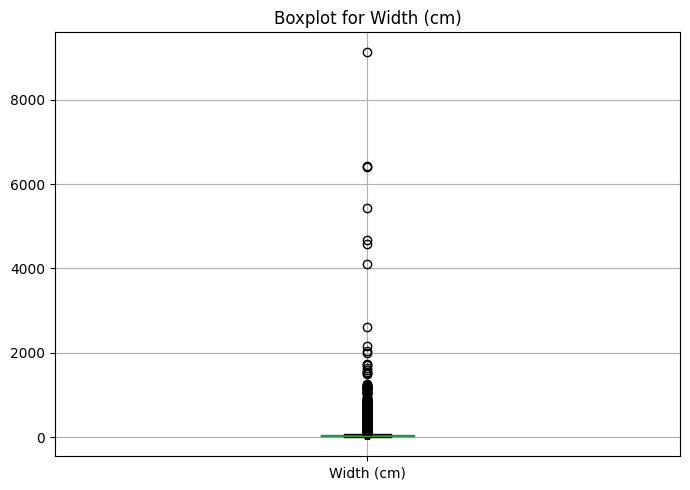

In [84]:
# Univariate analysis for numerical columns
numerical_columns = ['Height (cm)', 'Width (cm)']

for column in numerical_columns:
    median_value = df[column].median()
    print(f'Median {column}: {median_value}')

    # Plotting a boxplot for visualizing the distribution
    plt.figure(figsize=(7, 5))
    df.boxplot(column=[column])
    plt.title(f'Boxplot for {column}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

- box plot for numerical columns `Height` & `Width` shows the distribution of the data with some presence of outliers or anomaly data present

Univariate Analysis for Gender column


,Gender,Count
0,Male,105689
1,Female,18830
2,undisclosed,15101
3,Non-Binary,12


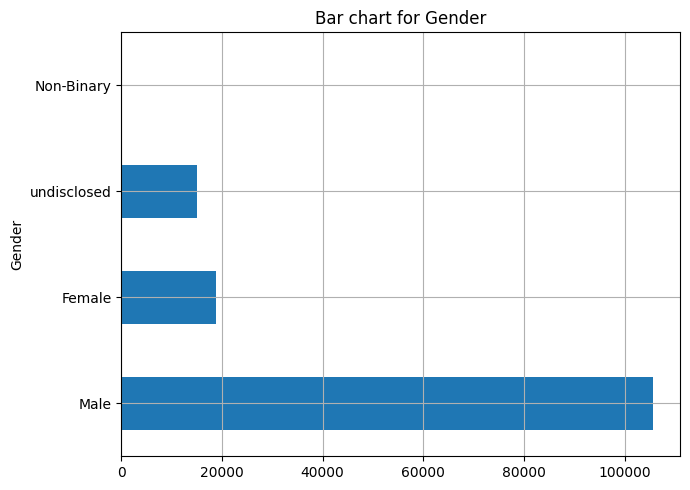

Univariate Analysis for Cataloged column


,Cataloged,Count
0,Y,94156
1,N,45476


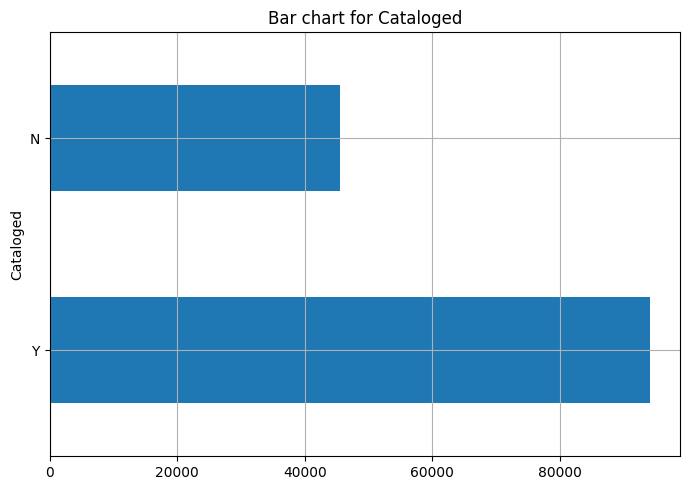

Univariate Analysis for Department column


,Department,Count
0,Drawings & Prints,77170
1,Photography,32988
2,Architecture & Design,20148
3,Painting & Sculpture,3981
4,Media and Performance,3006
5,Fluxus Collection,1568
6,Film,741
7,Architecture & Design - Image Archive,30


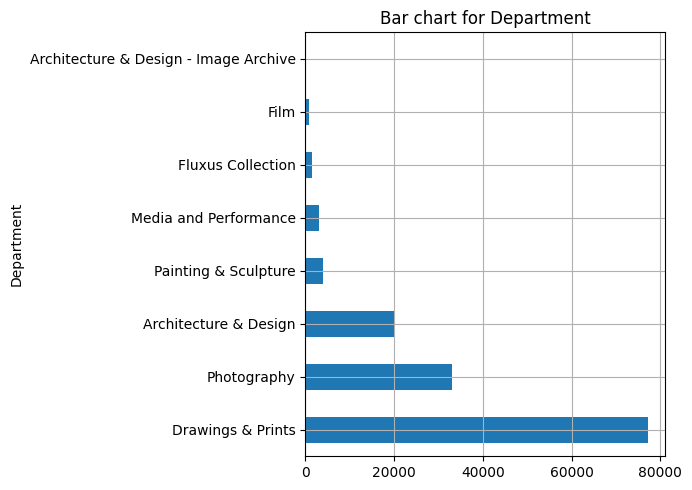

In [85]:
categorical_columns = ['Gender', 'Cataloged','Department']


for column in categorical_columns:
    value_counts = df[column].value_counts()
    value_counts_df = value_counts.reset_index()
    value_counts_df.columns = [column, 'Count']

    print(f"Univariate Analysis for {column} column")
    
    display(value_counts_df)

    # Plotting a bar chart for visualizing the distribution
    plt.figure(figsize=(7, 5))
    df[column].value_counts().plot(kind='barh')
    plt.title(f'Bar chart for {column}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

- for the `Gender` column, we have the `Male` gender most dominant and the `Non-Binary` least dominant
- for the `Cataloged` works column, we have more works Cataloged than Non-Cataloged
- for the `Department` column, we have `Drawings & Prints` as most dominant and `Architecture & Design` least dominant 

In [86]:
def disp_as_df(column_name:str) -> None:
      value_counts = df[column_name].value_counts()
      value_counts_df = value_counts.reset_index()
      value_counts_df.columns = [column_name, 'Count']

      print(f"Univariate Analysis for {column_name} column")

      display(value_counts_df)

Univariate Analysis for Classification column


,Classification,Count
0,Photograph,33944
1,Print,31900
2,Illustrated Book,27449
3,Drawing,14599
4,Design,12095
5,Architecture,3825
6,Mies van der Rohe Archive,3434
7,Painting,2393
8,Video,2266
9,Sculpture,1743


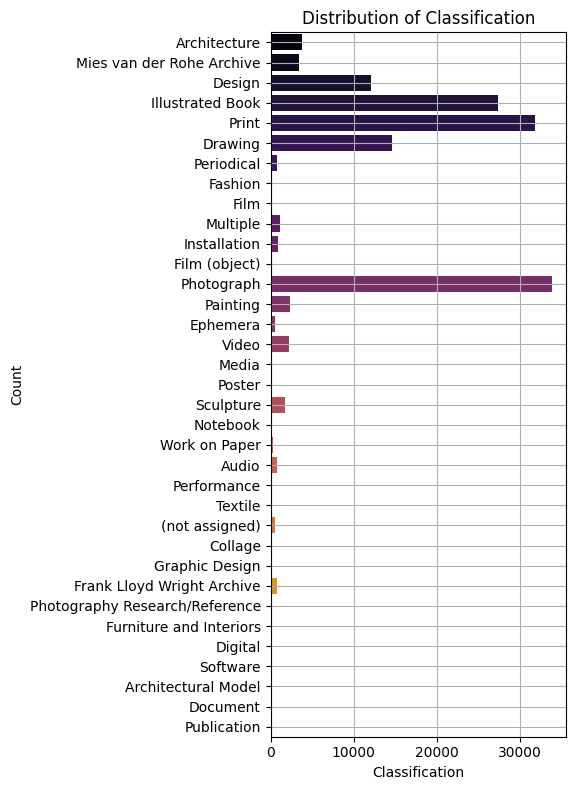

In [87]:
col = "Classification"
disp_as_df(col)

plt.figure(figsize=(6, 8))
sns.countplot(y=col, data=df, palette='inferno')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

- for `Classification` colunn we have `Photograph` as most used compared to `Document` type class

Univariate Analysis for Nationality column


,Nationality,Count
0,American,67047
1,French,23134
2,German,10003
3,British,6191
4,Spanish,3169
...,...,...
110,Sierra,1
111,Persian,1
112,Afghan,1
113,Tanzanian,1


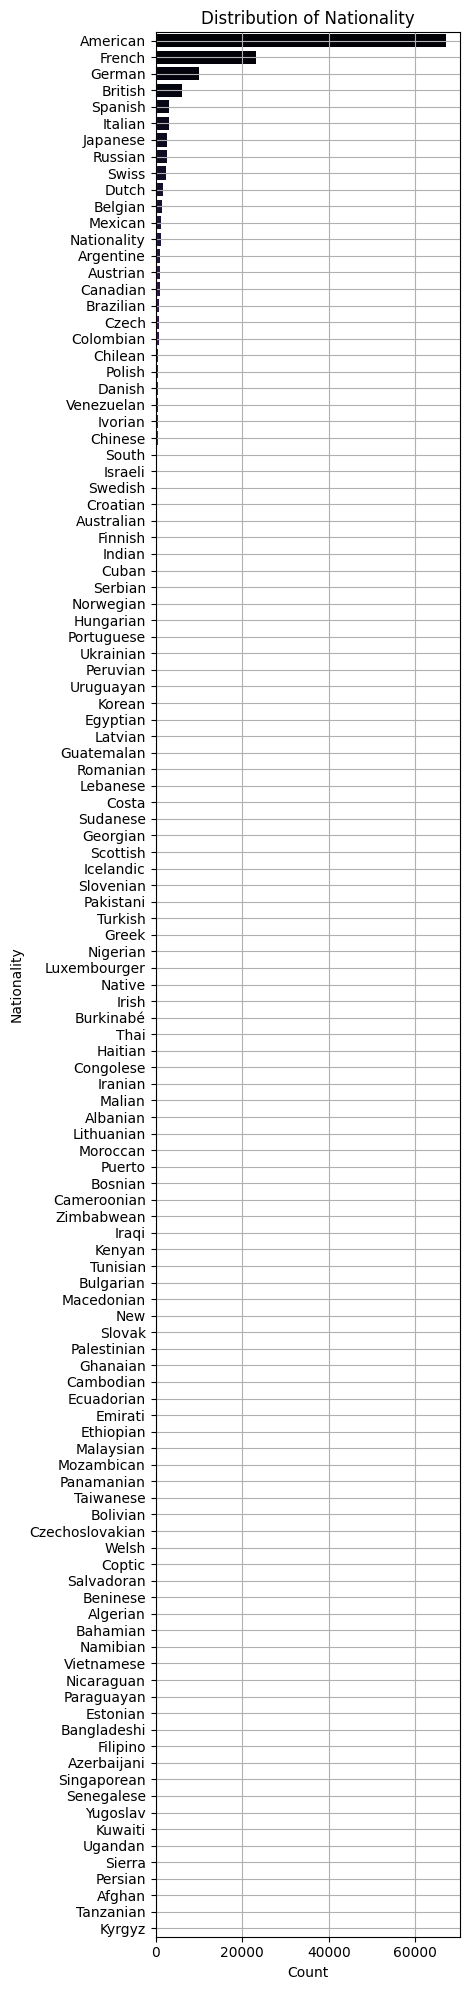

In [88]:
col="Nationality"
disp_as_df(col)

plt.figure(figsize=(5, 20))
sns.countplot(y=col, data=df, palette='inferno', order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Count')
plt.ylabel(col)
plt.grid(True)
plt.tight_layout()
plt.show()

- for the `Nationality` column we have `American` artists as most common

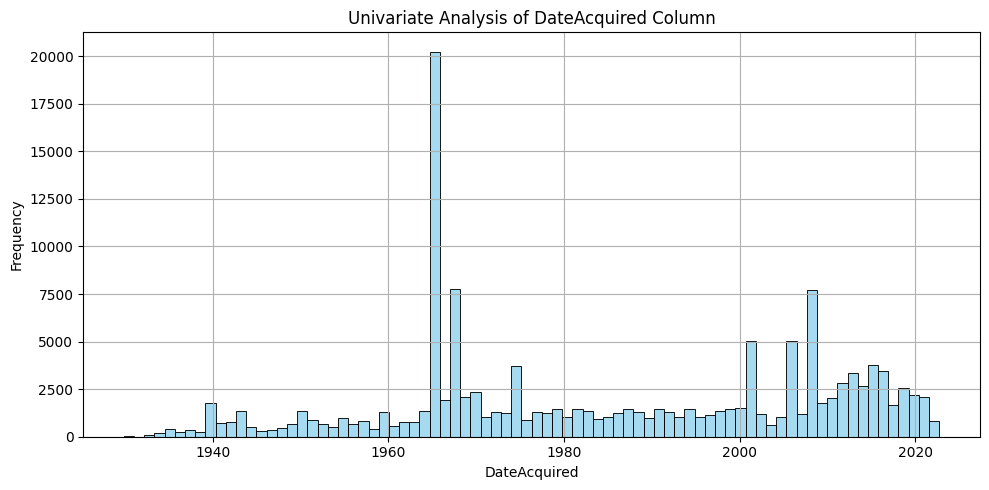

In [89]:
# Plot a histogram for the date column
plt.figure(figsize=(10, 5))
sns.histplot(df['DateAcquired'], bins=80, kde=False, color='skyblue')
plt.title('Univariate Analysis of DateAcquired Column')
plt.xlabel('DateAcquired')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

- `1970` region seems to be the date with the highest acquisition of works made followed by the `2007` region

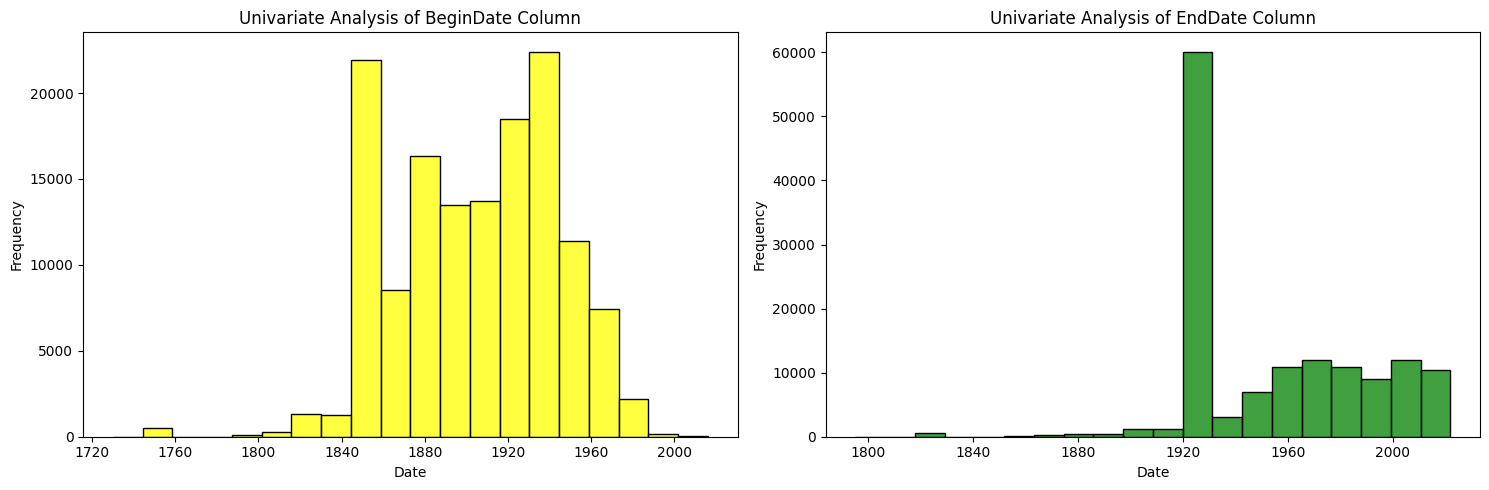

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 'StartDate'
sns.histplot(df['BeginDate'], bins=20, kde=False, color='yellow', ax=axes[0])
axes[0].set_title('Univariate Analysis of BeginDate Column')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Frequency')

# Plot 'EndDate'
sns.histplot(df['EndDate'], bins=20, kde=False, color='green', ax=axes[1])
axes[1].set_title('Univariate Analysis of EndDate Column')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- `1920` region seems to be the common `EndDate`
- `1840` region & `1950` region seem to be the most common `BeginDate`'s